<a href="https://colab.research.google.com/github/HitanshSondhi/EDA-PROJECT-1/blob/main/22BDS0325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

Saving DATASET.CSV to DATASET.CSV


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Cleaning**

In [4]:
df = pd.read_csv('DATASET.CSV')

In [ ]:
print("\nDimensions of the dataset (rows, columns):", df.shape)


Dimensions of the dataset (rows, columns): (4895, 15)


In [ ]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee body_camera      

In [ ]:
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                id          age
count  4895.000000  4895.000000
mean   2902.148519    36.549750
std    1683.467910    12.694348
min       3.000000     6.000000
25%    1441.500000    27.000000
50%    2847.000000    35.000000
75%    4352.500000    45.000000
max    5925.000000    91.000000


In [ ]:
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4892 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4893 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   obje

In [ ]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
id                         0
name                       0
date                       0
manner_of_death            3
armed                      0
age                        0
gender                     0
race                       2
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              2
dtype: int64


In [9]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


# Remove duplicate rows
print(f"\nNumber of duplicate rows before cleaning: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")



Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [6]:
print(f"\nNumber of duplicate rows before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")


Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/tmp/ipython-input-2370506791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [10]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64


# **Univariate Analysis**


UNIVARIATE ANALYSIS (Improved)


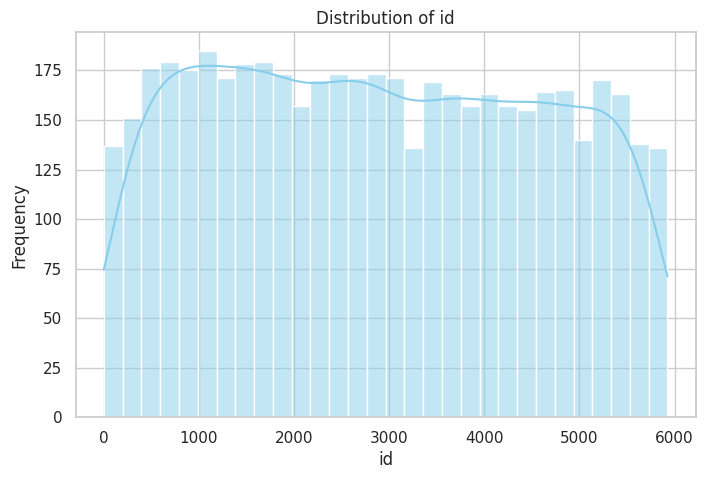

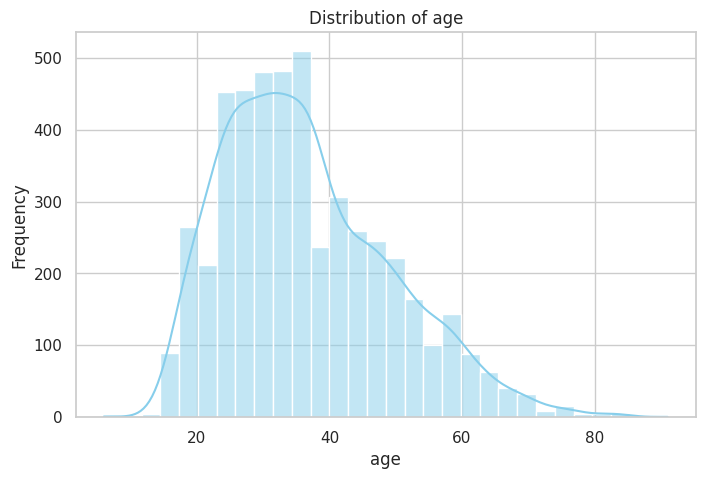

Skipping name (too many categories: 4851)
Skipping date (too many categories: 1792)


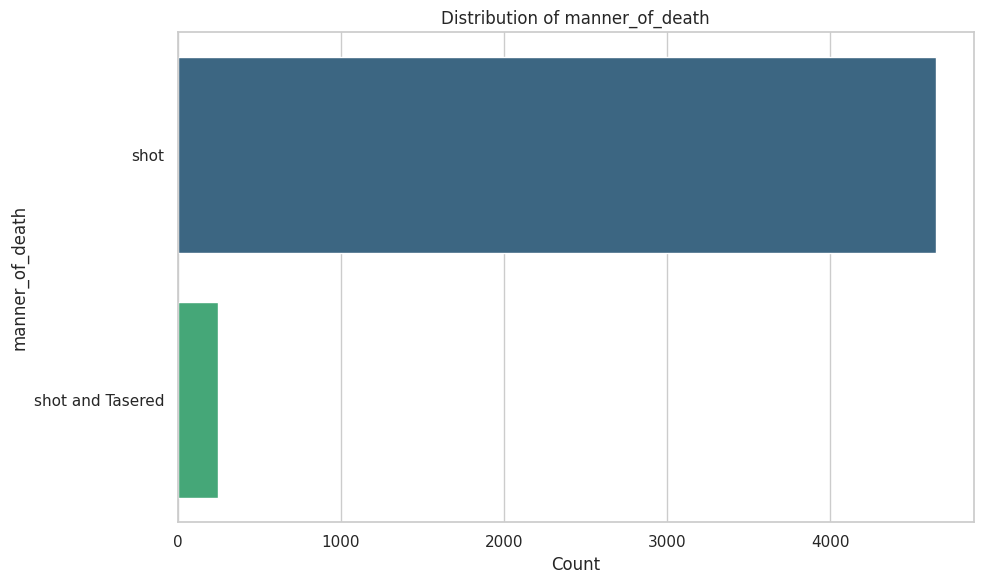

/tmp/ipython-input-1536568764.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


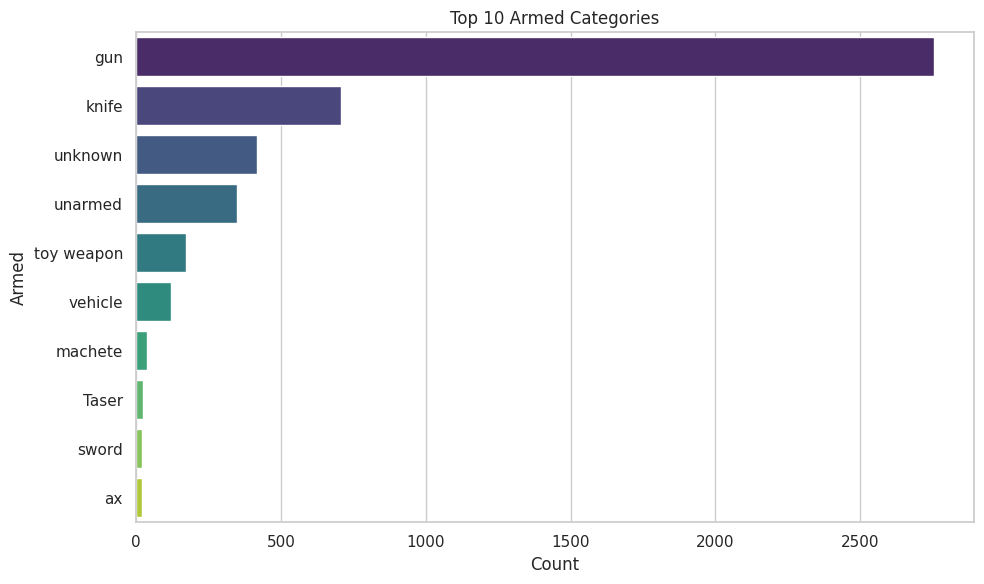

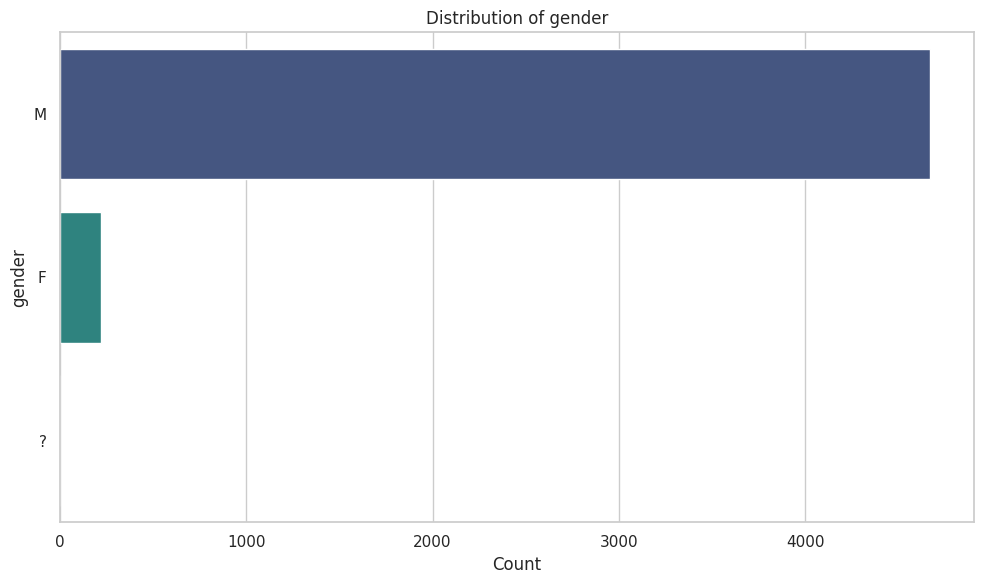

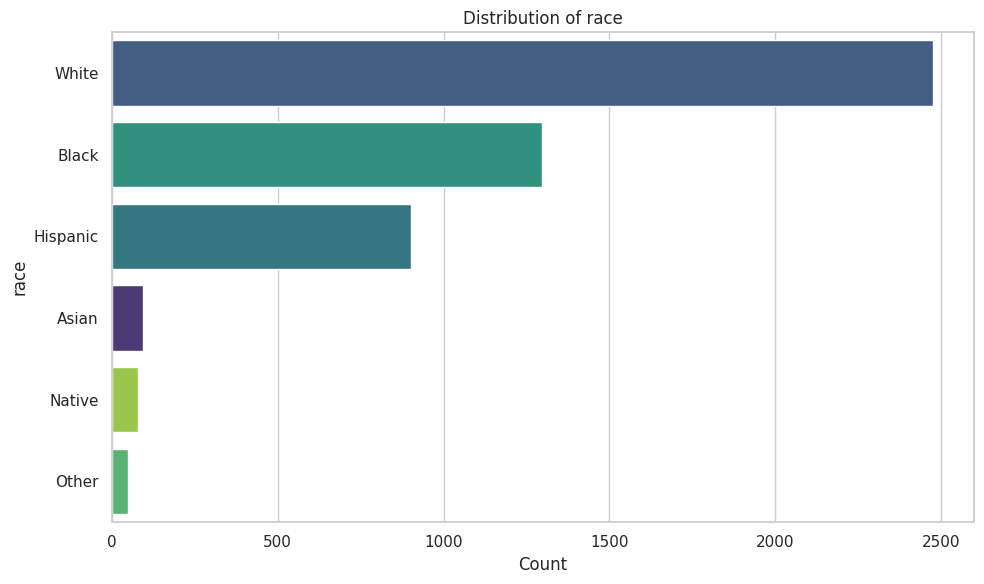

Skipping city (too many categories: 2288)
Skipping state (too many categories: 51)


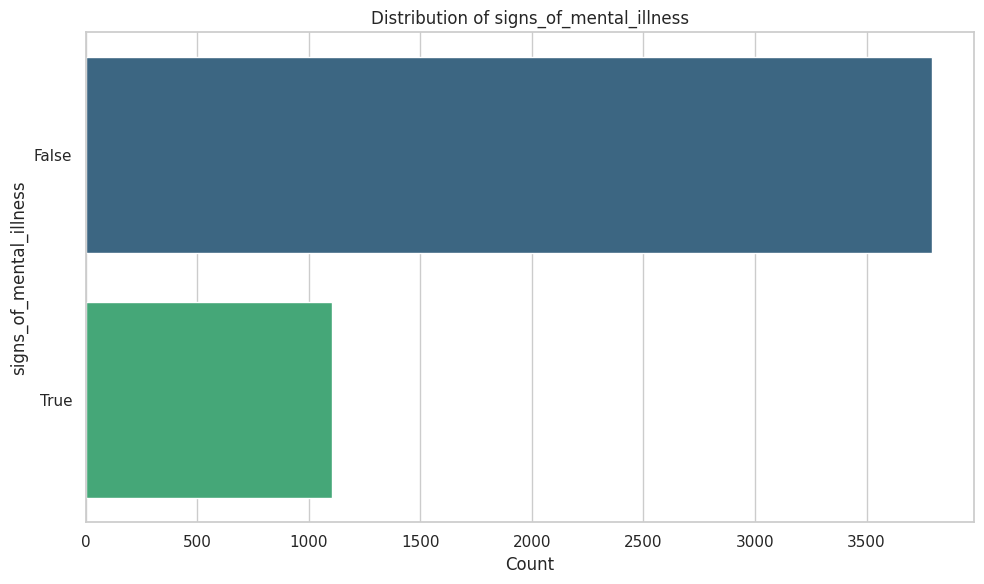

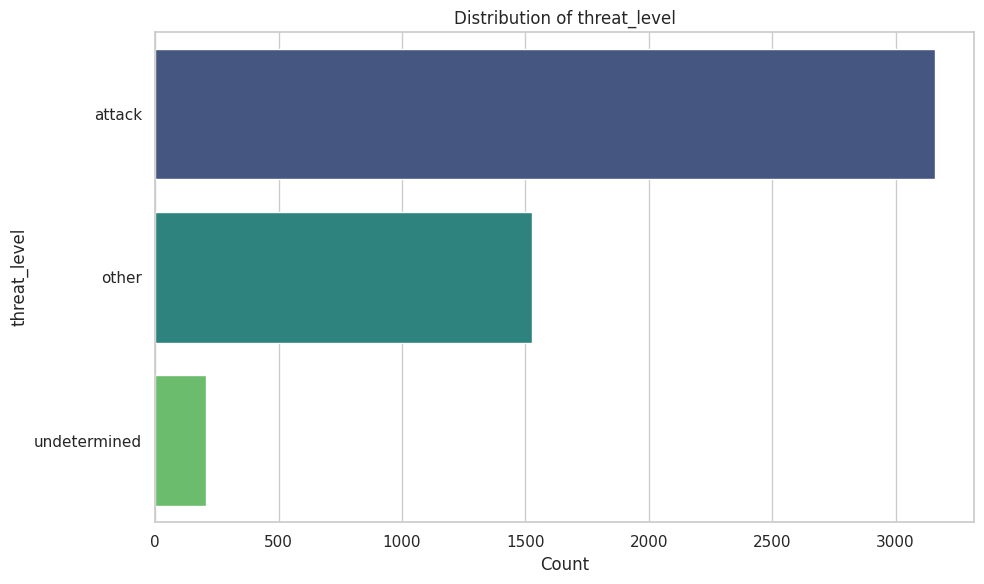

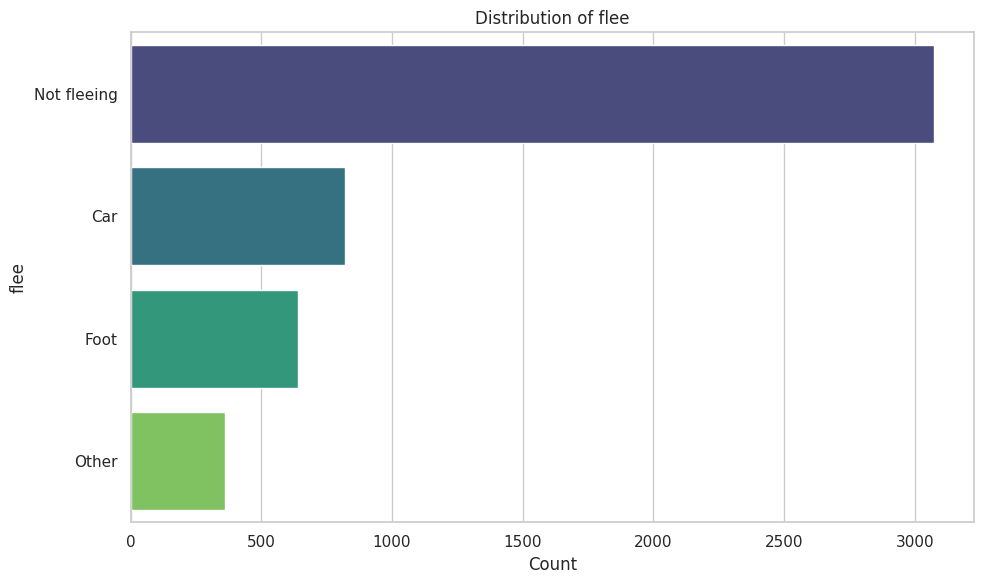

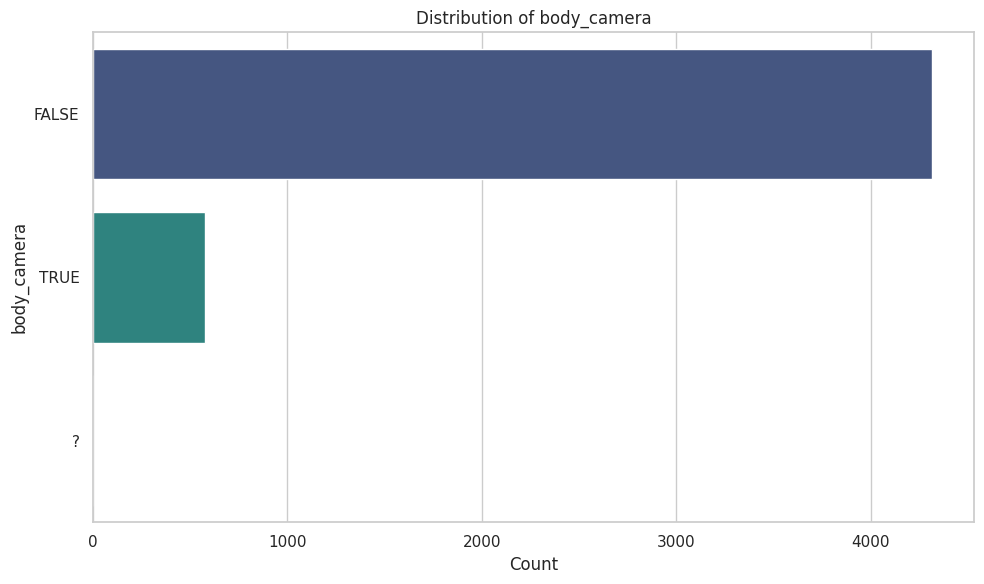

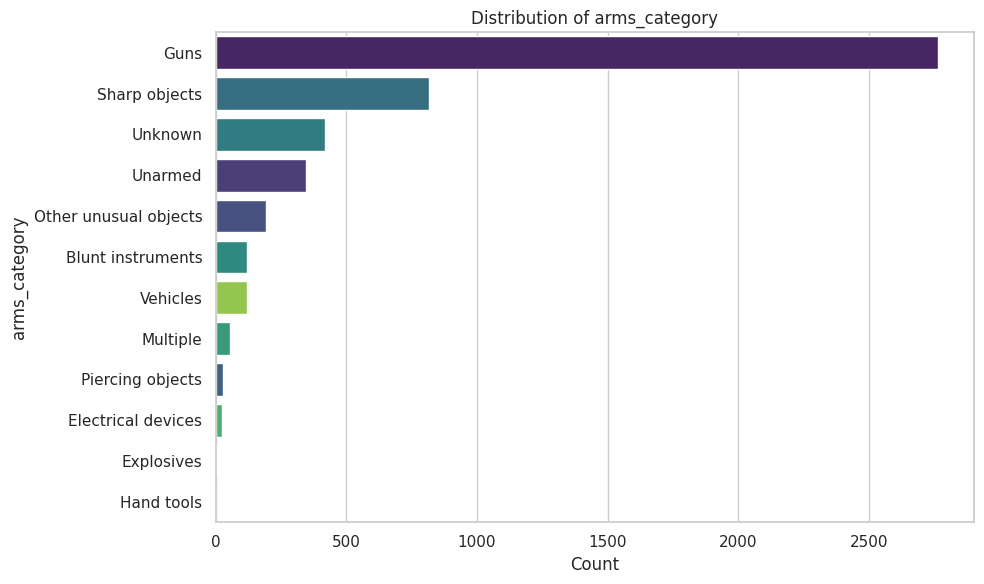

In [16]:
sns.set_theme(style="whitegrid")
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns


# Numerical distributions
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Categorical distributions (skip high-cardinality)
for col in cat_cols:
    n_unique = df[col].nunique()

    # Skip free-text like names/IDs
    if n_unique > 20 and col not in ["armed"]:
        print(f"Skipping {col} (too many categories: {n_unique})")
        continue

    plt.figure(figsize=(10, 6))
    if col == "armed":  # Show only top 10
        top_10 = df[col].value_counts().nlargest(10)
        sns.barplot(
            y=top_10.index,
            x=top_10.values,
            palette="viridis"
        )
        plt.title("Top 10 Armed Categories")
        plt.xlabel("Count")
        plt.ylabel("Armed")
    elif np.issubdtype(df[col].dtype, np.datetime64):  # Dates → time-series
        df['year'] = df[col].dt.year
        yearly = df['year'].value_counts().sort_index()
        sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
        plt.title(f"Trend over Years ({col})")
        plt.xlabel("Year")
        plt.ylabel("Count")
    else:
        sns.countplot(
            y=df[col],
            hue=df[col],
            order=df[col].value_counts().index,
            palette="viridis",
            legend=False
        )
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# **Bivariate Analysis**

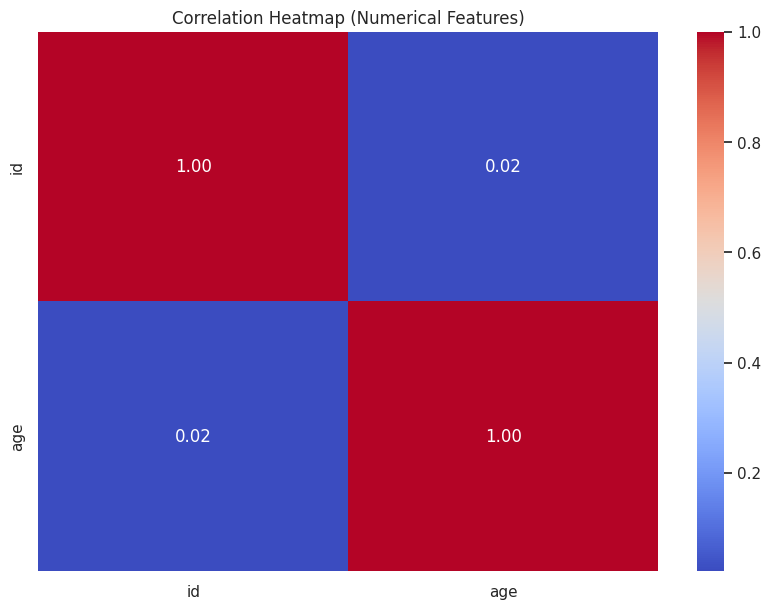

Skipping name in boxplots (too many categories: 4851)
Skipping date in boxplots (too many categories: 1792)


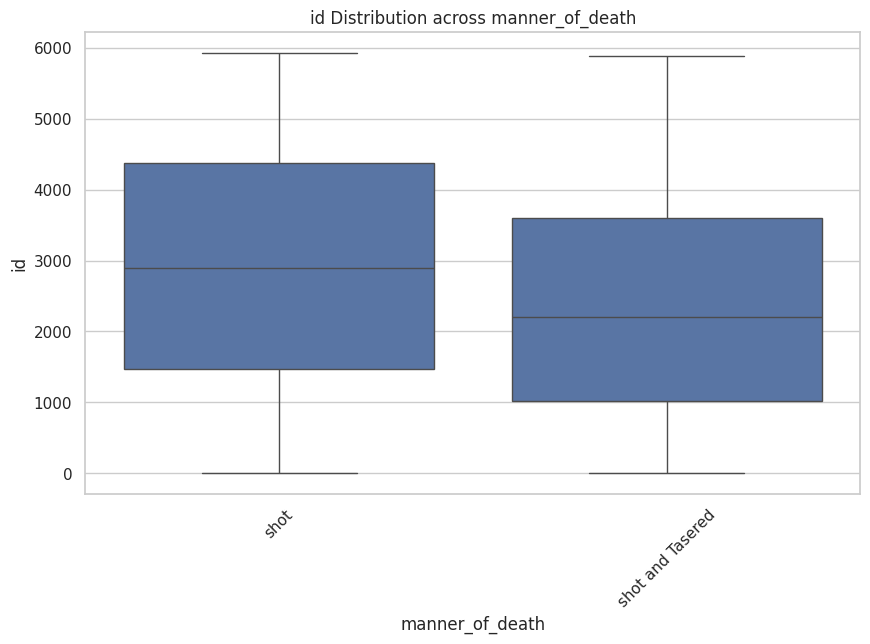

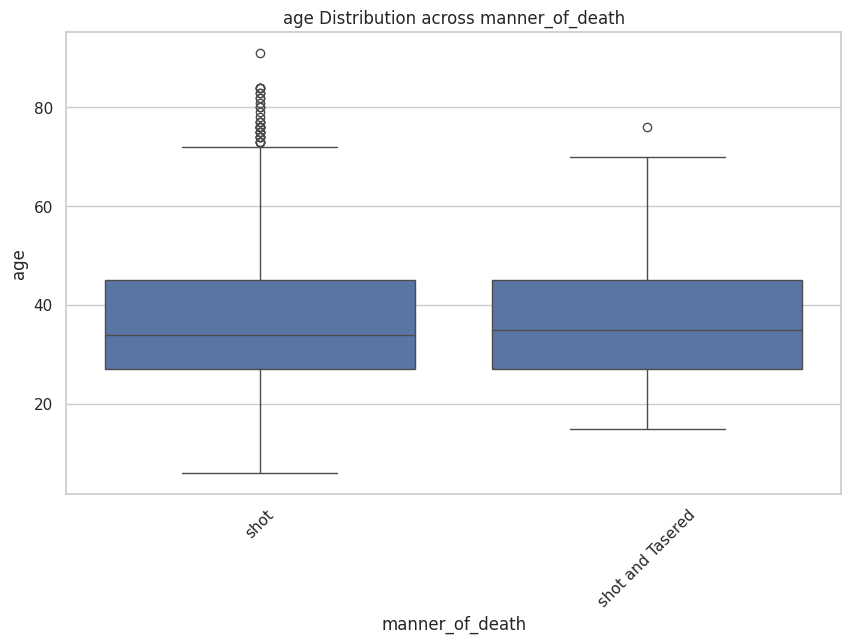

Skipping armed in boxplots (too many categories: 89)


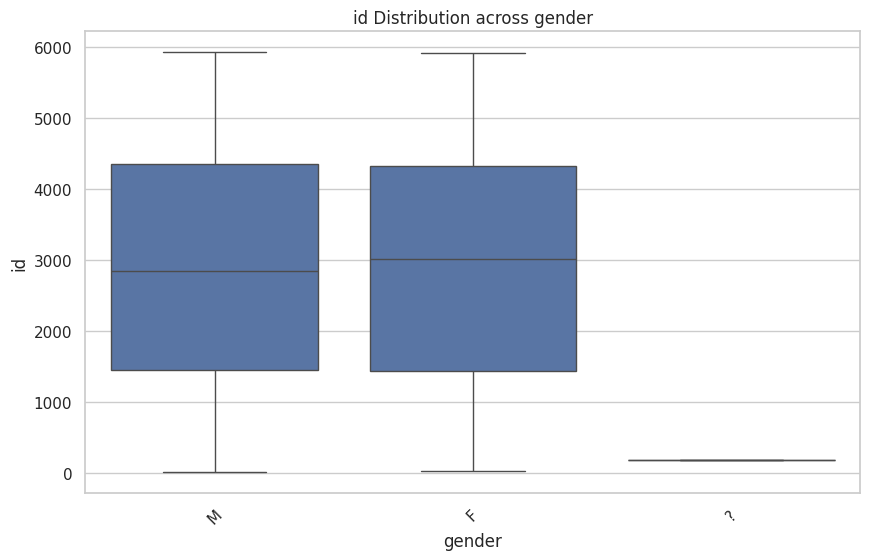

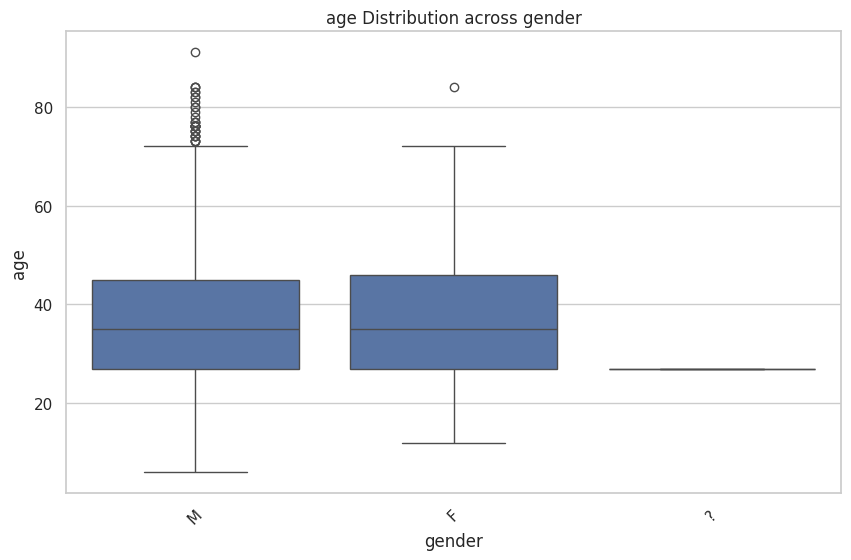

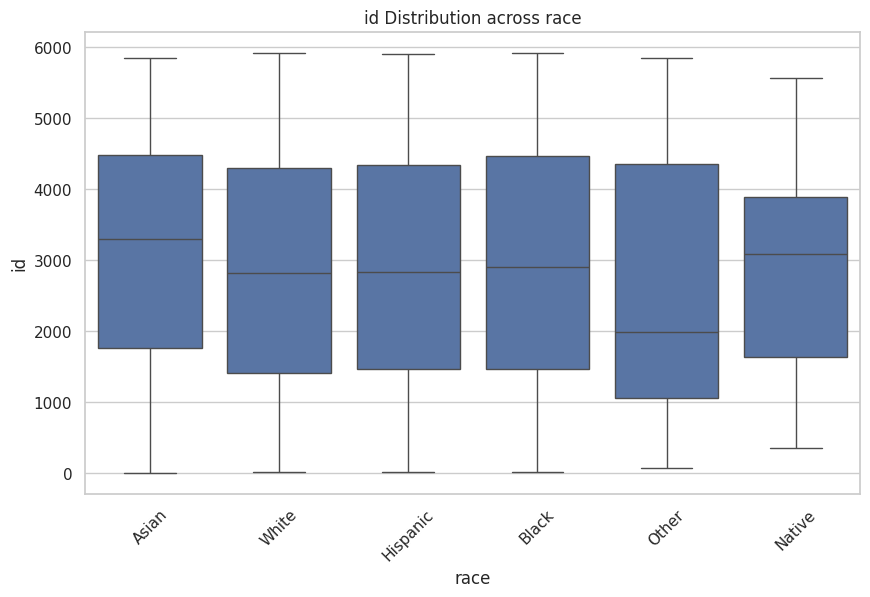

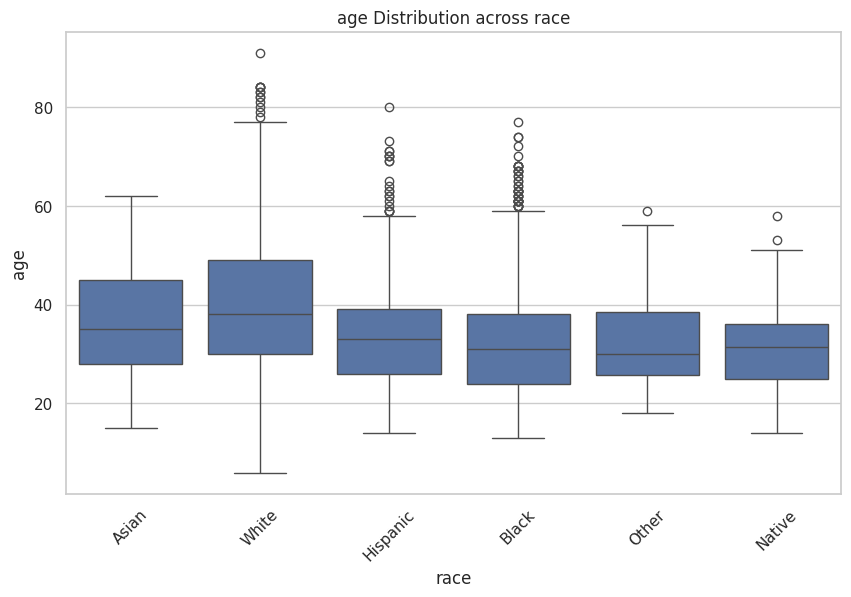

Skipping city in boxplots (too many categories: 2288)
Skipping state in boxplots (too many categories: 51)


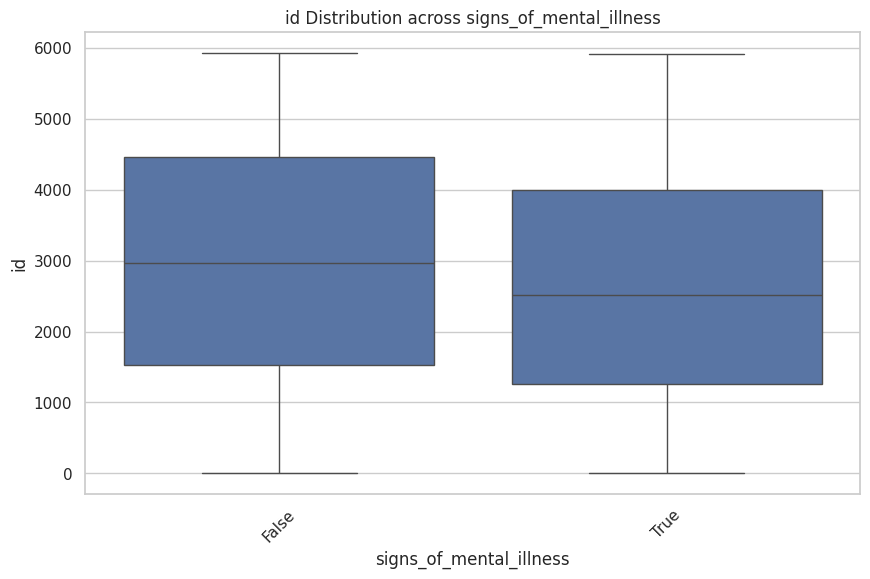

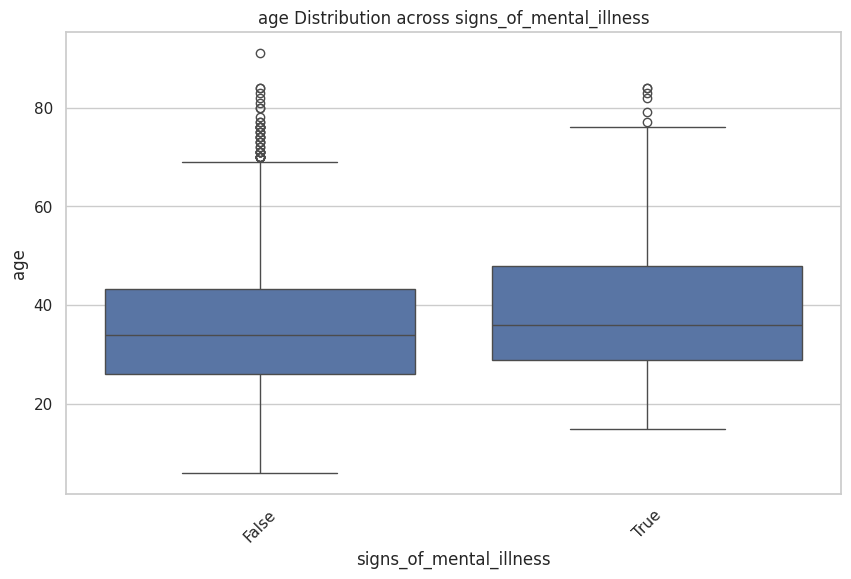

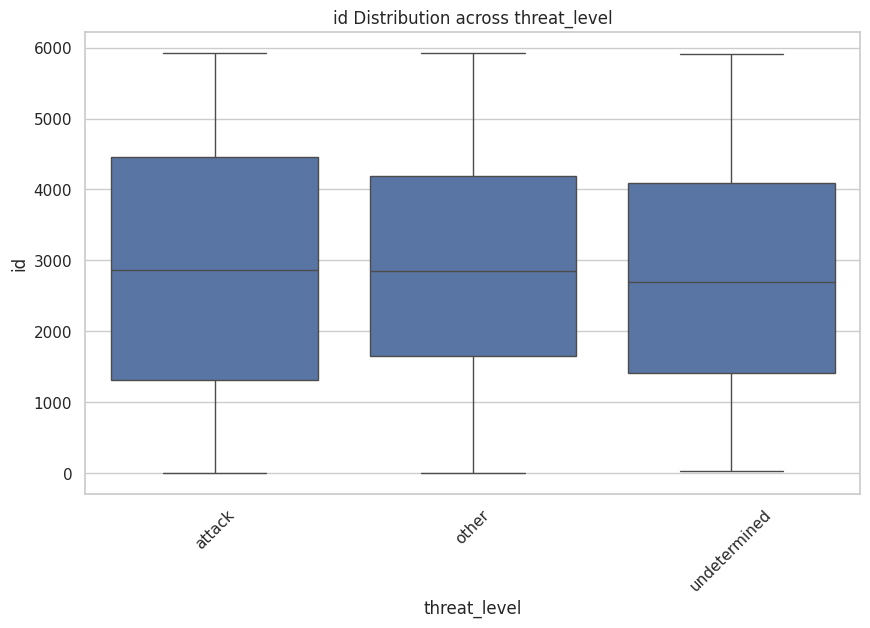

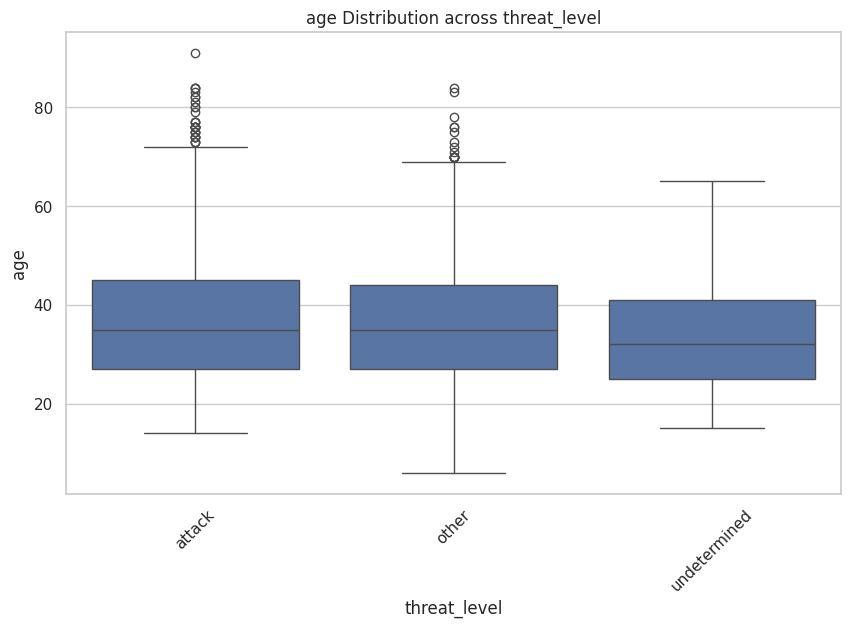

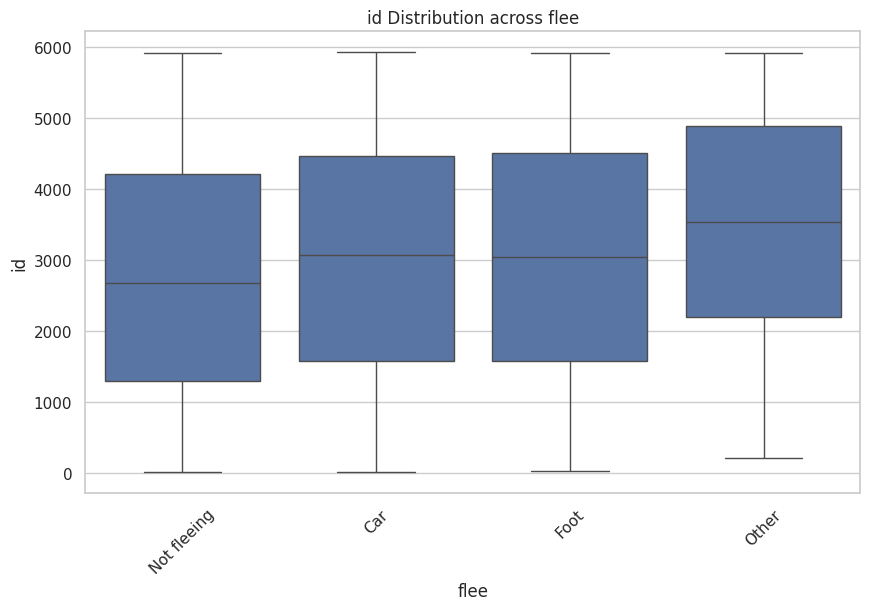

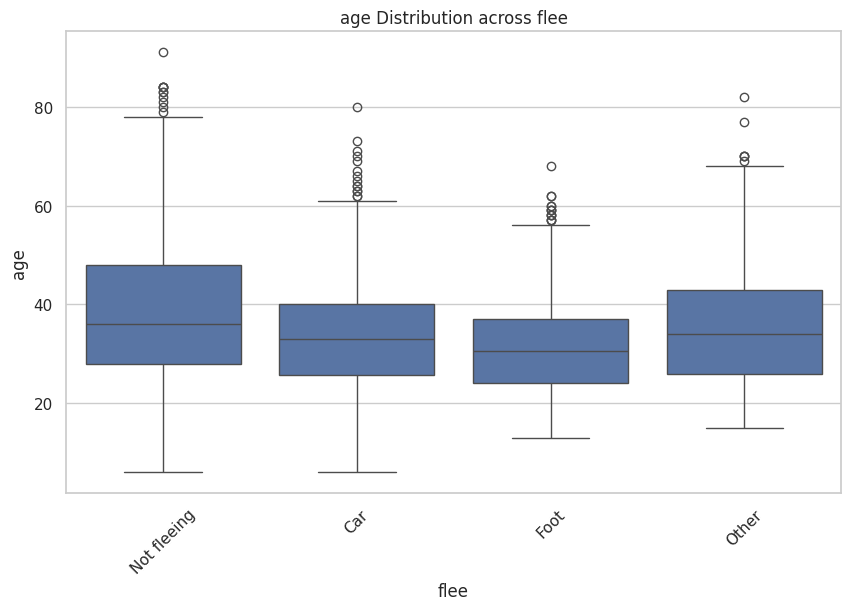

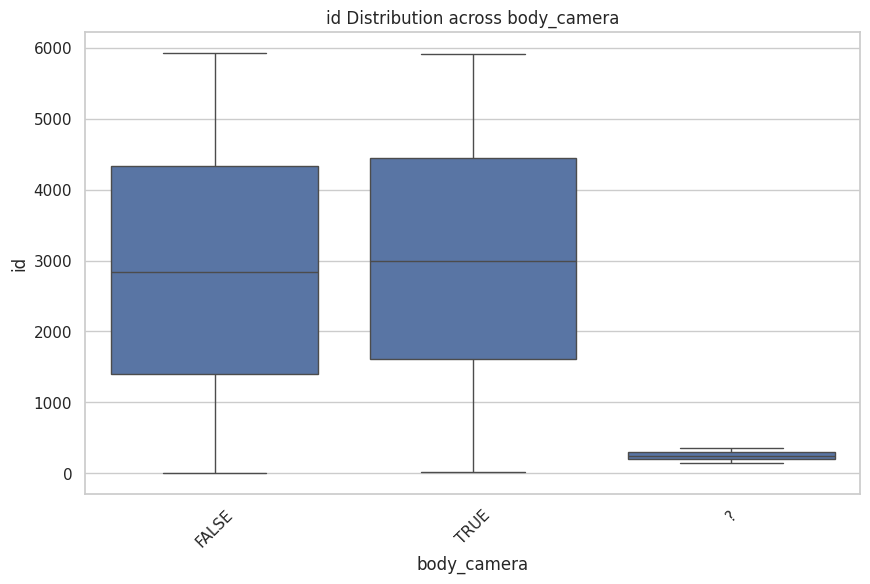

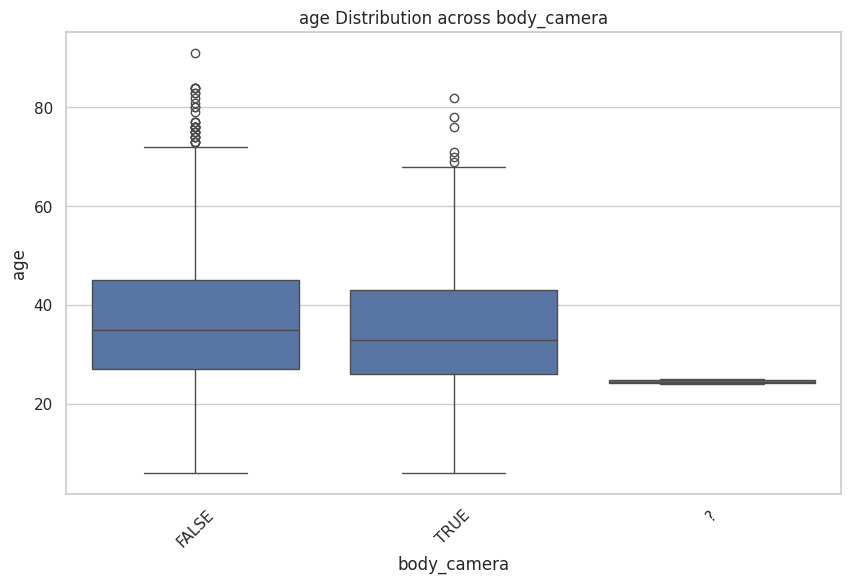

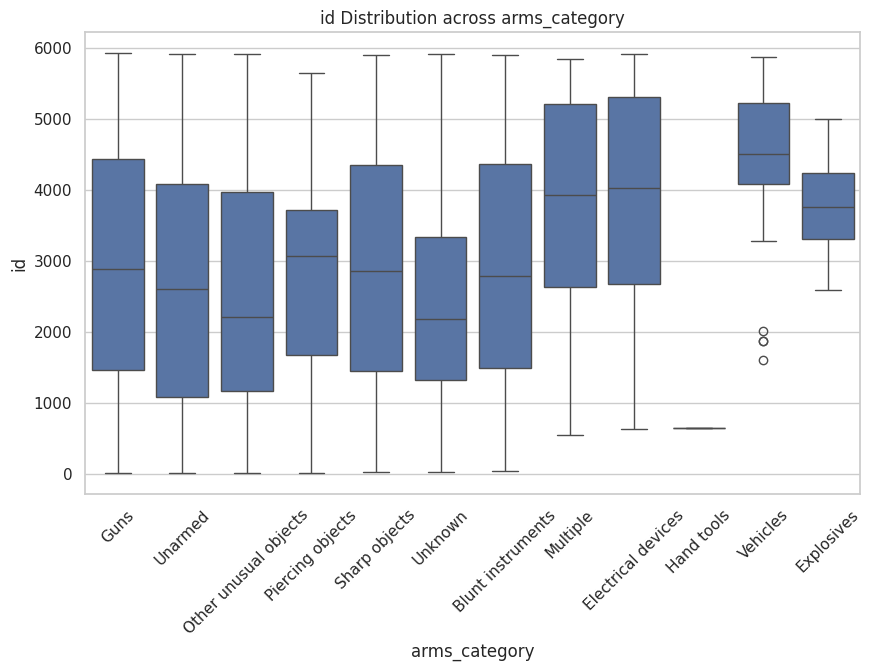

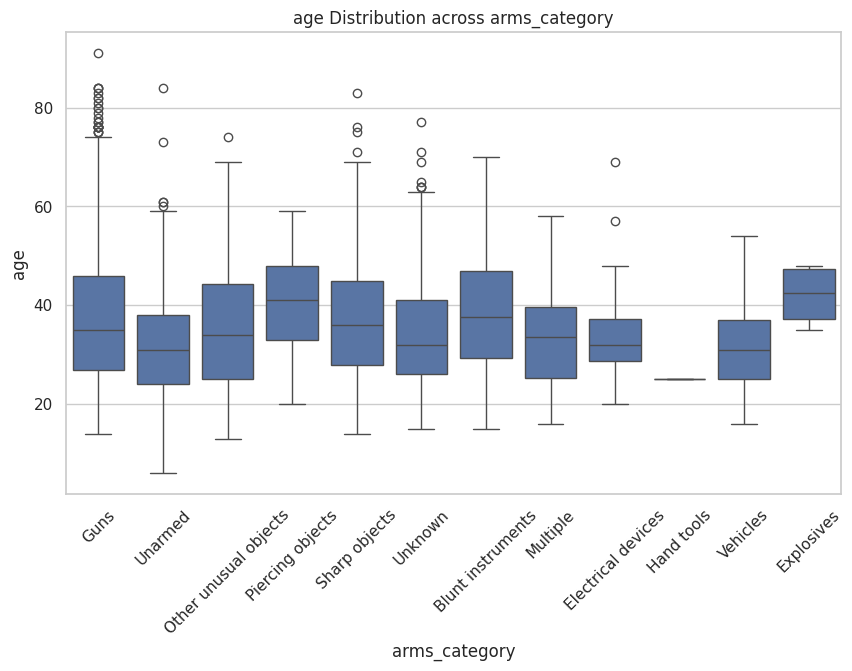

Skipping name vs date (too many categories: 4851, 1792)
Skipping name vs manner_of_death (too many categories: 4851, 2)
Skipping name vs armed (too many categories: 4851, 89)
Skipping name vs gender (too many categories: 4851, 3)
Skipping name vs race (too many categories: 4851, 6)
Skipping name vs city (too many categories: 4851, 2288)
Skipping name vs state (too many categories: 4851, 51)
Skipping name vs signs_of_mental_illness (too many categories: 4851, 2)
Skipping name vs threat_level (too many categories: 4851, 3)
Skipping name vs flee (too many categories: 4851, 4)
Skipping name vs body_camera (too many categories: 4851, 3)
Skipping name vs arms_category (too many categories: 4851, 12)
Skipping date vs manner_of_death (too many categories: 1792, 2)
Skipping date vs armed (too many categories: 1792, 89)
Skipping date vs gender (too many categories: 1792, 3)
Skipping date vs race (too many categories: 1792, 6)
Skipping date vs city (too many categories: 1792, 2288)
Skipping date 

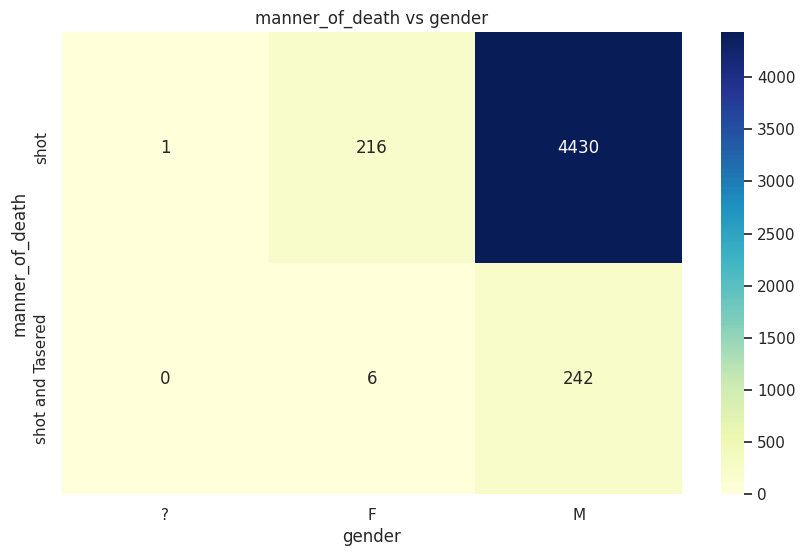

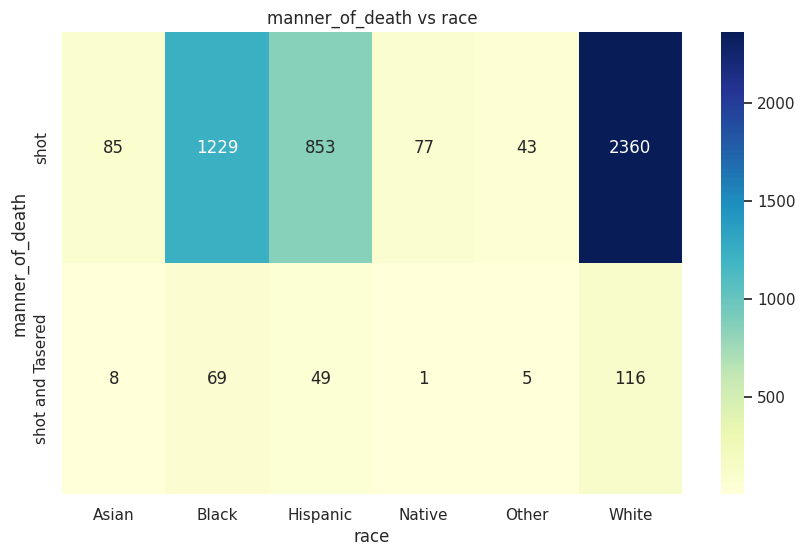

Skipping manner_of_death vs city (too many categories: 2, 2288)
Skipping manner_of_death vs state (too many categories: 2, 51)


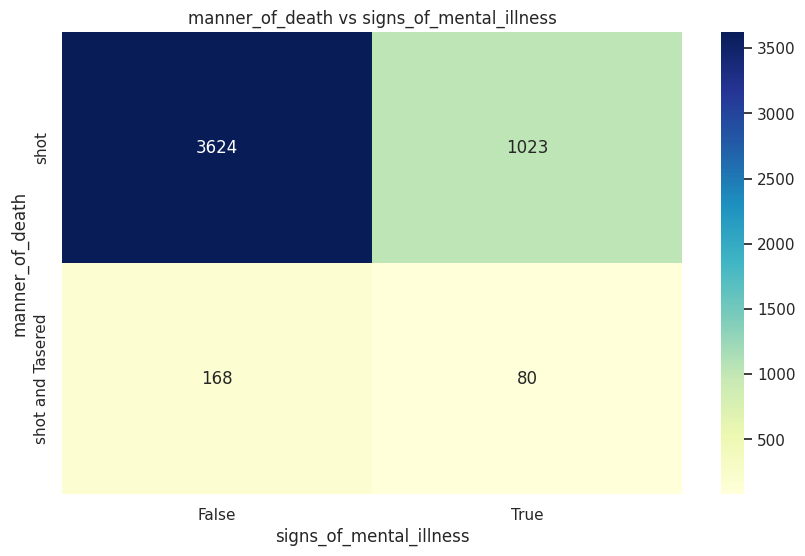

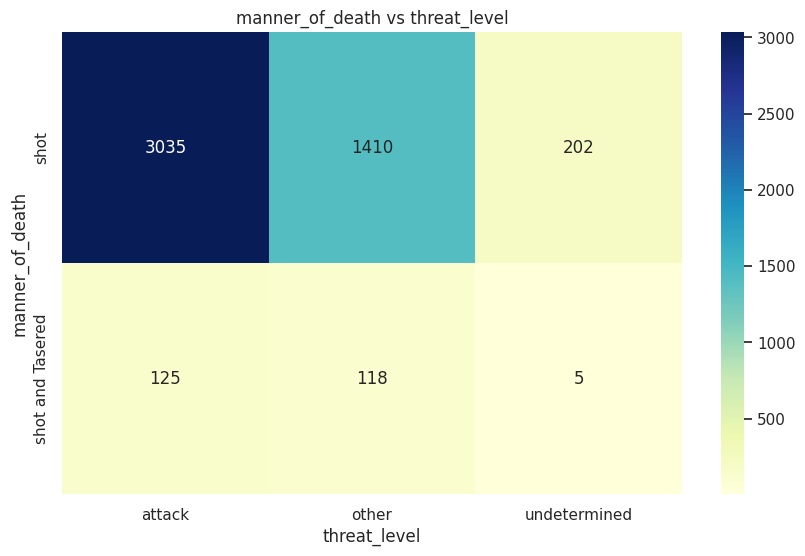

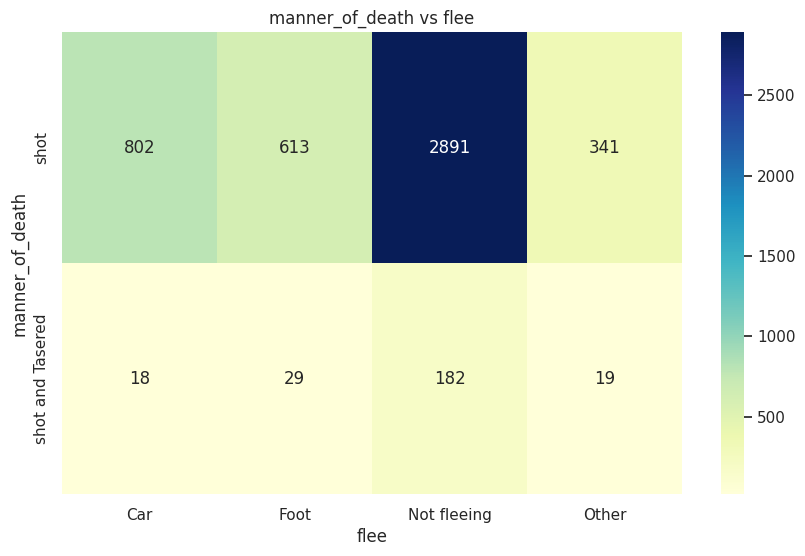

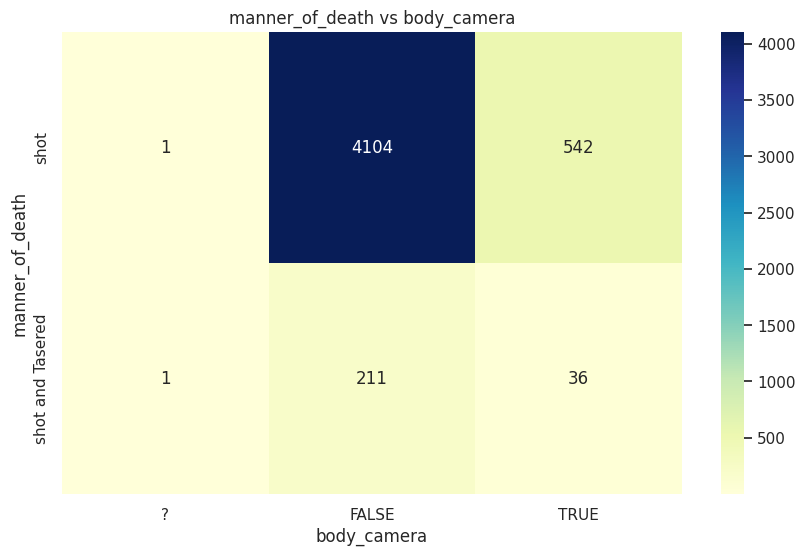

Skipping manner_of_death vs arms_category (too many categories: 2, 12)
Skipping armed vs gender (too many categories: 89, 3)
Skipping armed vs race (too many categories: 89, 6)
Skipping armed vs city (too many categories: 89, 2288)
Skipping armed vs state (too many categories: 89, 51)
Skipping armed vs signs_of_mental_illness (too many categories: 89, 2)
Skipping armed vs threat_level (too many categories: 89, 3)
Skipping armed vs flee (too many categories: 89, 4)
Skipping armed vs body_camera (too many categories: 89, 3)
Skipping armed vs arms_category (too many categories: 89, 12)


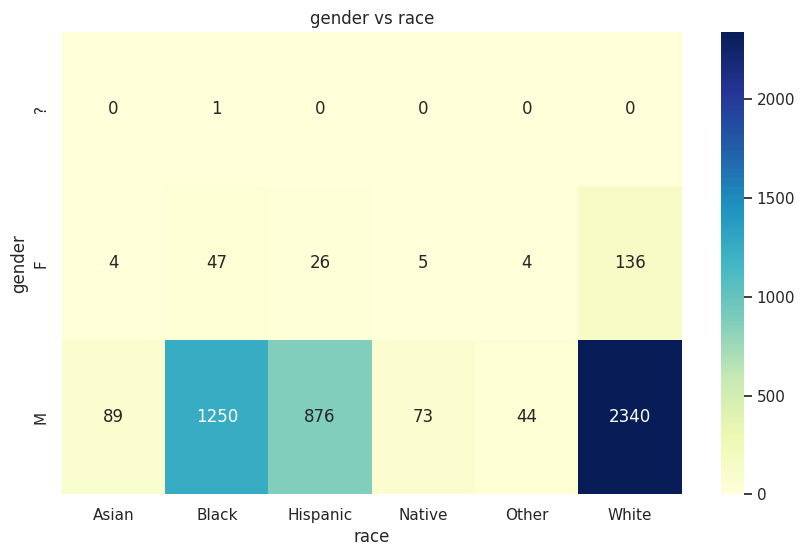

Skipping gender vs city (too many categories: 3, 2288)
Skipping gender vs state (too many categories: 3, 51)


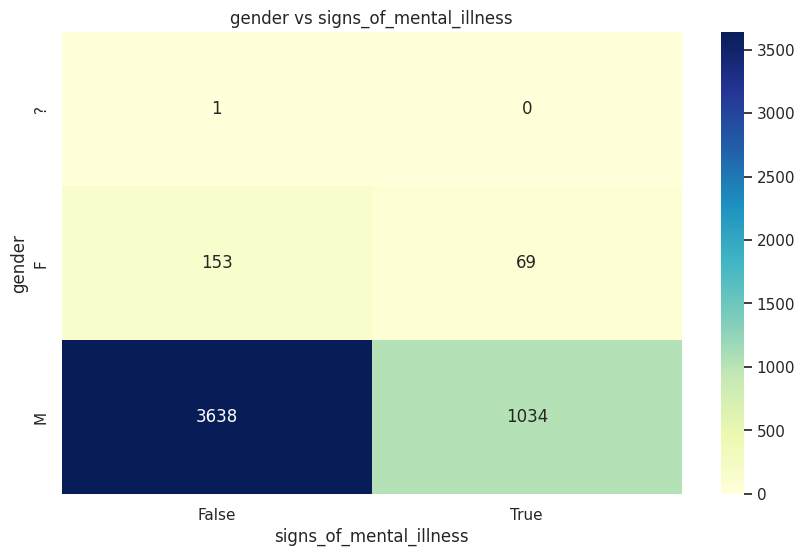

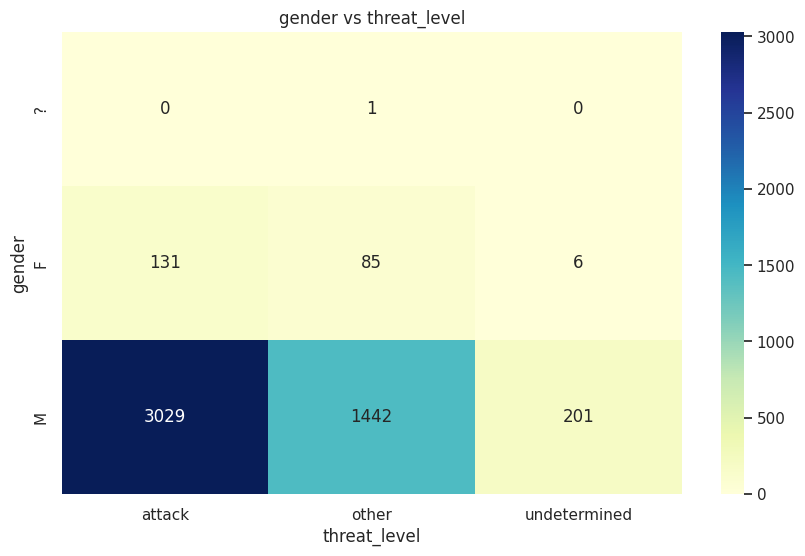

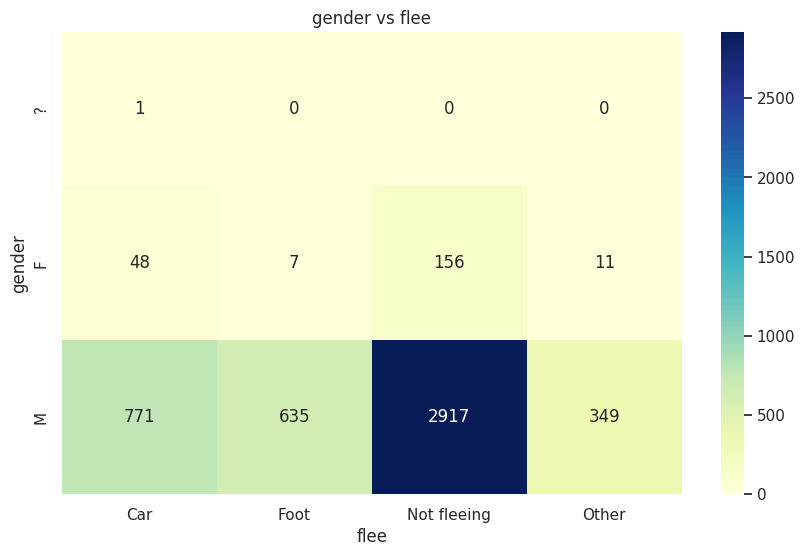

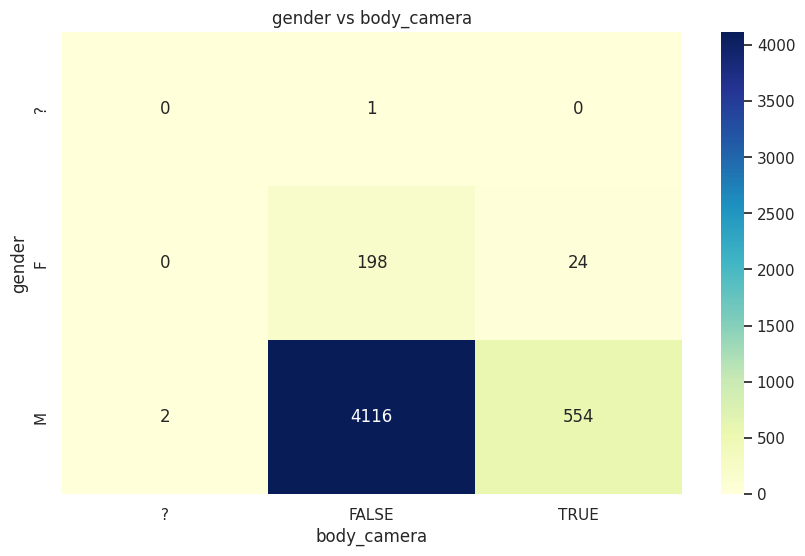

Skipping gender vs arms_category (too many categories: 3, 12)
Skipping race vs city (too many categories: 6, 2288)
Skipping race vs state (too many categories: 6, 51)


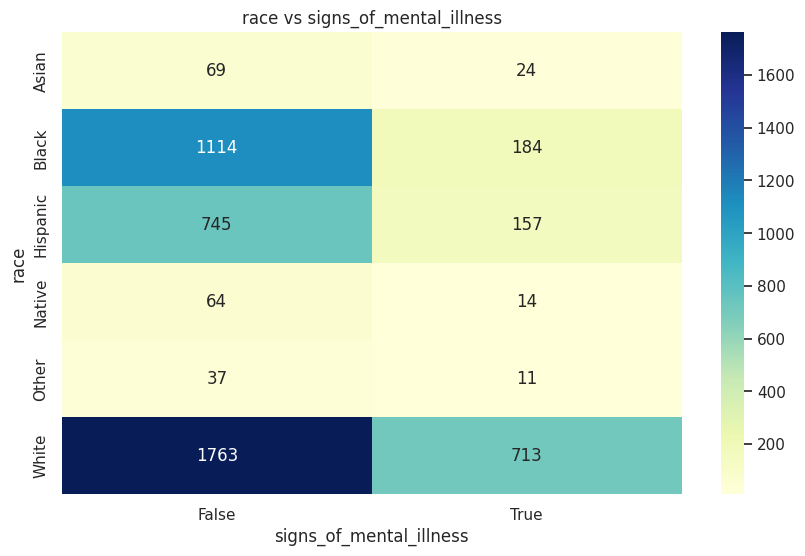

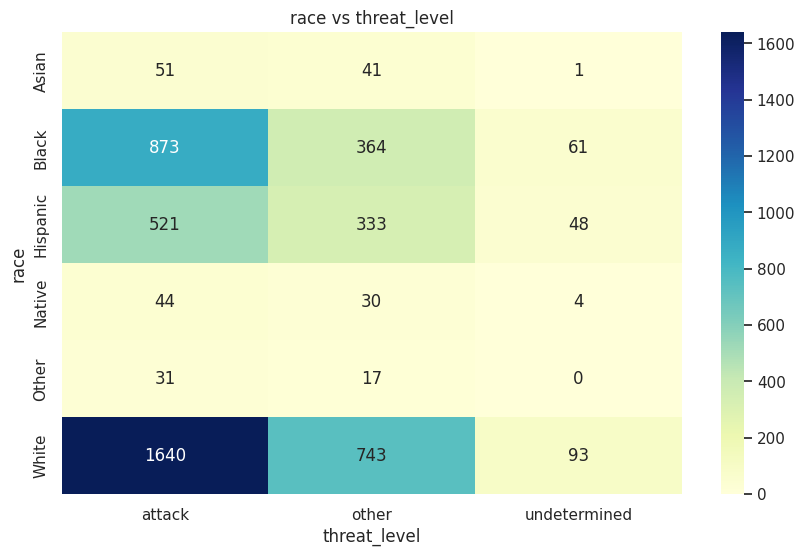

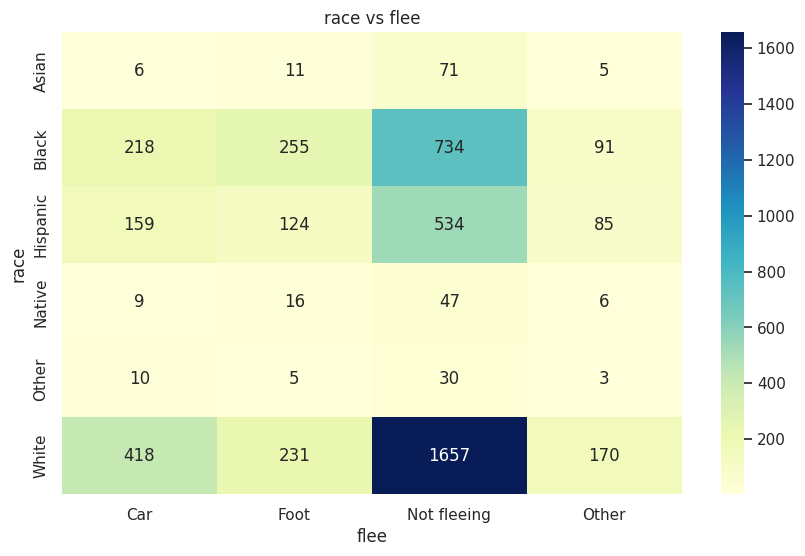

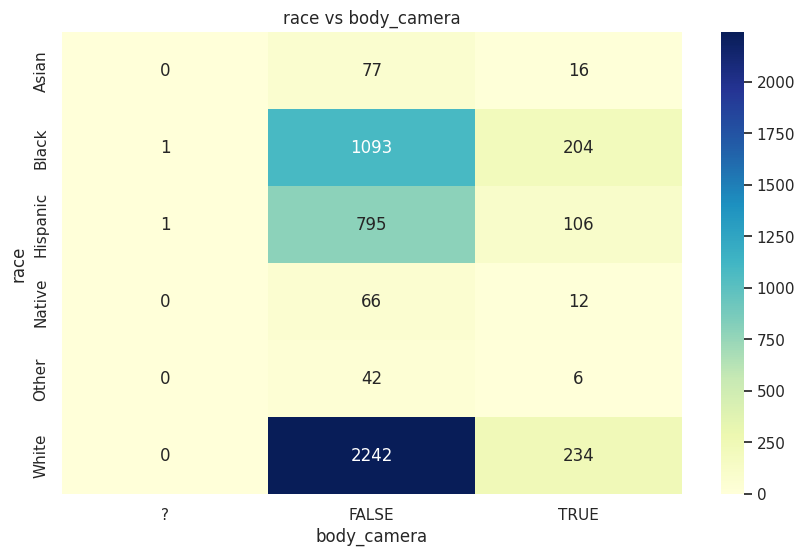

Skipping race vs arms_category (too many categories: 6, 12)
Skipping city vs state (too many categories: 2288, 51)
Skipping city vs signs_of_mental_illness (too many categories: 2288, 2)
Skipping city vs threat_level (too many categories: 2288, 3)
Skipping city vs flee (too many categories: 2288, 4)
Skipping city vs body_camera (too many categories: 2288, 3)
Skipping city vs arms_category (too many categories: 2288, 12)
Skipping state vs signs_of_mental_illness (too many categories: 51, 2)
Skipping state vs threat_level (too many categories: 51, 3)
Skipping state vs flee (too many categories: 51, 4)
Skipping state vs body_camera (too many categories: 51, 3)
Skipping state vs arms_category (too many categories: 51, 12)


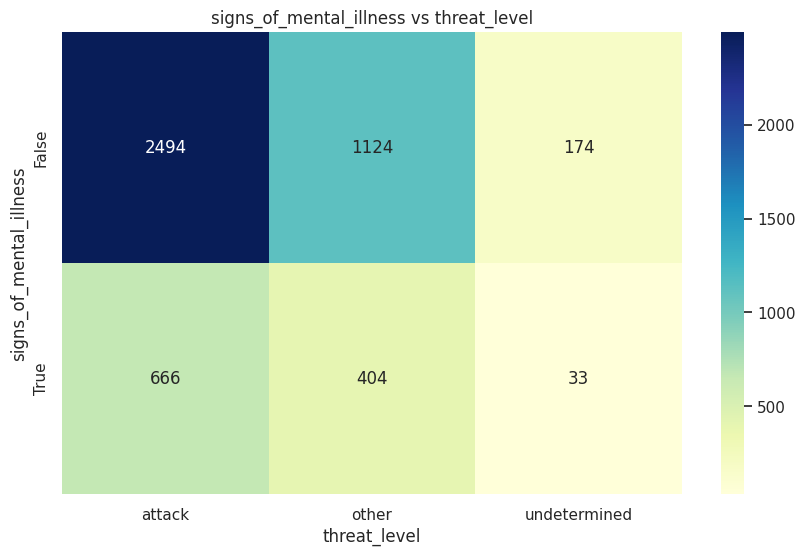

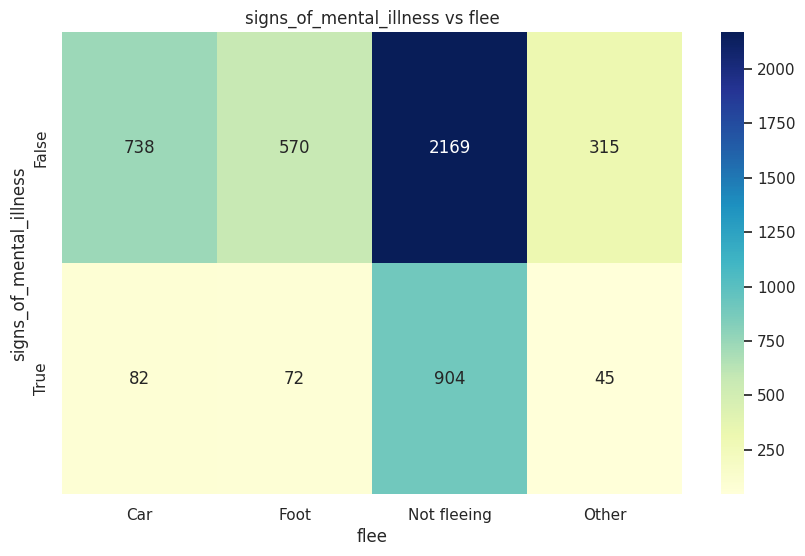

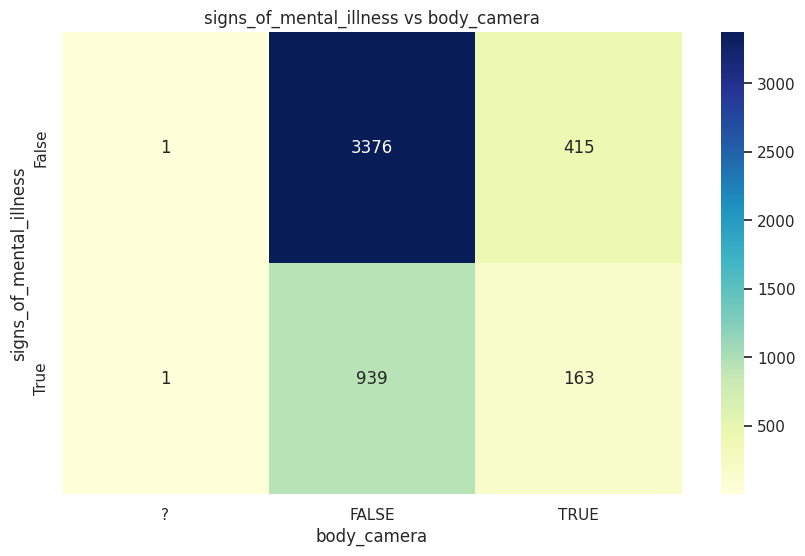

Skipping signs_of_mental_illness vs arms_category (too many categories: 2, 12)


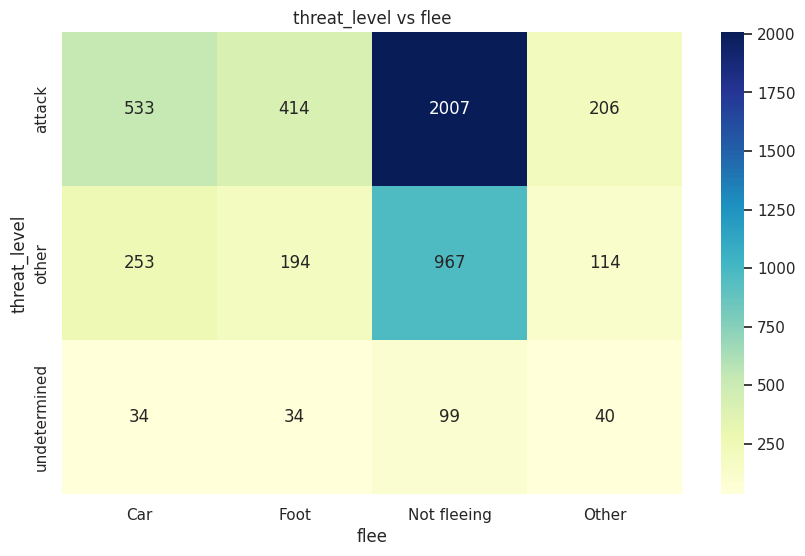

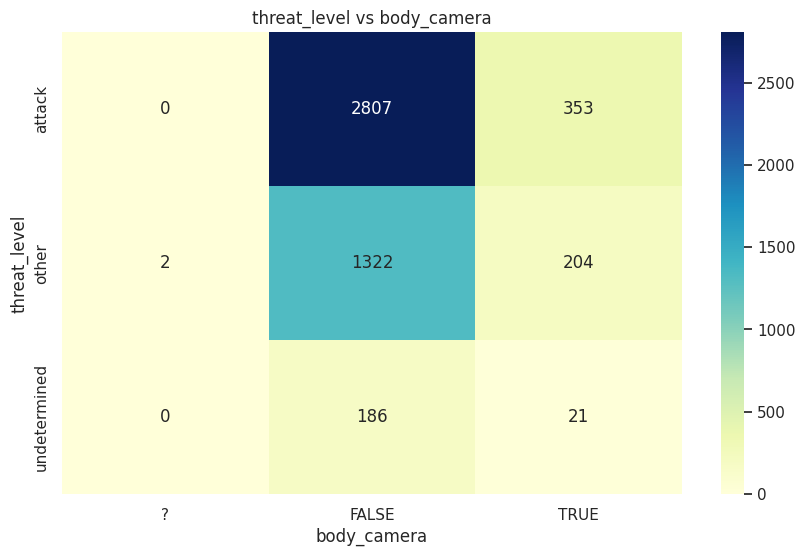

Skipping threat_level vs arms_category (too many categories: 3, 12)


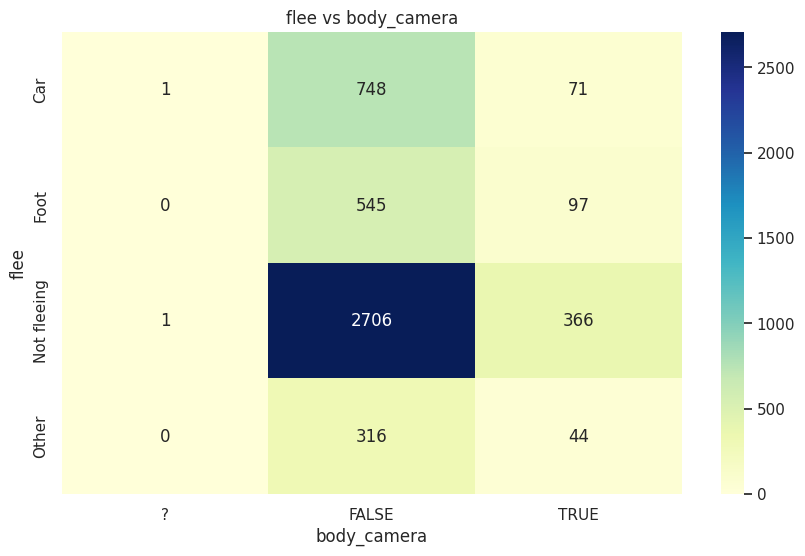

Skipping flee vs arms_category (too many categories: 4, 12)
Skipping body_camera vs arms_category (too many categories: 3, 12)


In [20]:
if len(num_cols) > 1:
    plt.figure(figsize=(10, 7))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.show()


# Numerical vs Categorical (boxplots, skip high-cardinality)
for col in cat_cols:
    n_unique = df[col].nunique()
    if n_unique > 15:
        print(f"Skipping {col} in boxplots (too many categories: {n_unique})")
        continue
    for num in num_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} Distribution across {col}")
        plt.xticks(rotation=45)
        plt.savefig(f"bivariate_{num}_vs_{col}.png")
        plt.show()

# Categorical vs Categorical (crosstab heatmap with Top-N)
TOP_N = 10
for i in range(len(cat_cols) - 1):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        n1, n2 = df[col1].nunique(), df[col2].nunique()
        if n1 > TOP_N or n2 > TOP_N:
            print(f"Skipping {col1} vs {col2} (too many categories: {n1}, {n2})")
            continue
        ct = pd.crosstab(df[col1], df[col2])
        plt.figure(figsize=(10, 6))
        sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f"{col1} vs {col2}")
        plt.show()



# **Multivariate Analysis**

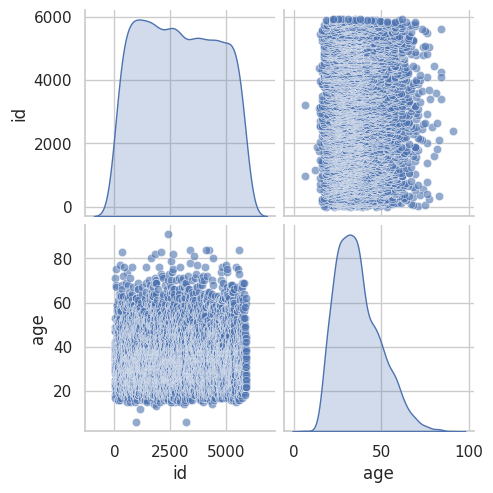

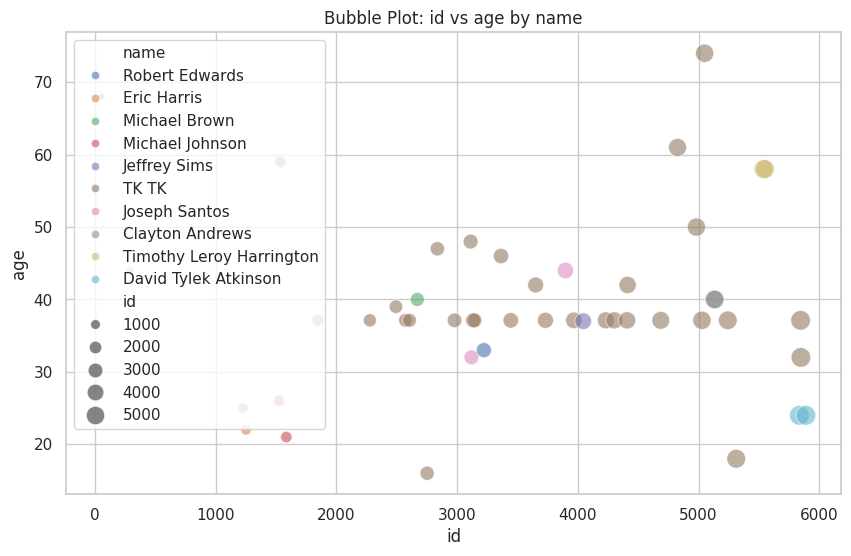

In [21]:
if 2 <= len(num_cols) <= 6:
    sns.pairplot(df[num_cols], diag_kind="kde", plot_kws={"alpha": 0.6})
    plt.show()

else:
    print("Skipping pairplot (too few or too many numeric columns).")

# Bubble plot (numeric vs numeric + categorical hue, Top-N restriction)
if len(num_cols) >= 2 and len(cat_cols) > 0:
    cat = cat_cols[0]
    if df[cat].nunique() > TOP_N:
        top_vals = df[cat].value_counts().nlargest(TOP_N).index
        df_tmp = df[df[cat].isin(top_vals)]
    else:
        df_tmp = df.copy()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=df_tmp[num_cols[0]],
        y=df_tmp[num_cols[1]],
        size=df_tmp[num_cols[0]],
        hue=df_tmp[cat],
        alpha=0.6,
        sizes=(20, 200)
    )
    plt.title(f"Bubble Plot: {num_cols[0]} vs {num_cols[1]} by {cat}")
    plt.show()


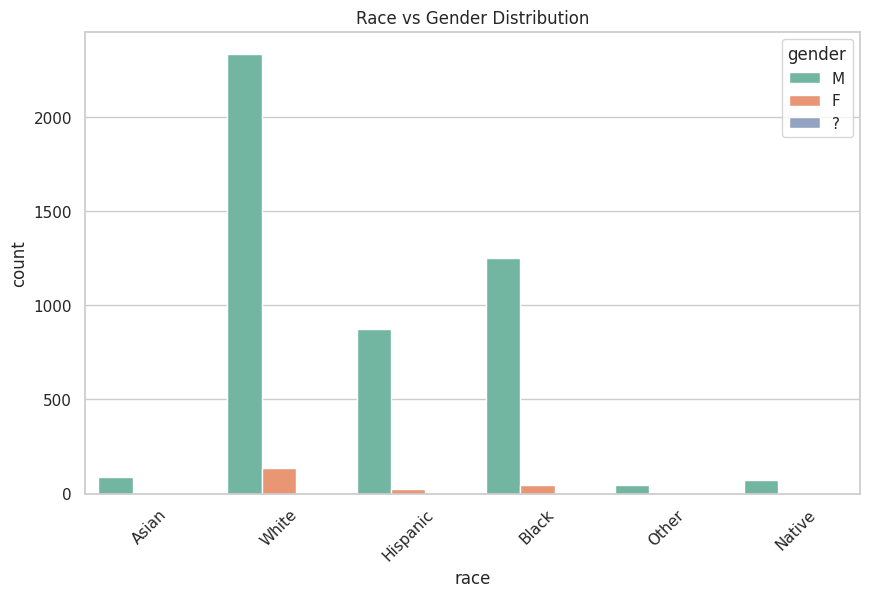

In [22]:
if "race" in df.columns and "gender" in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x="race", hue="gender", data=df, palette="Set2")
    plt.title("Race vs Gender Distribution")
    plt.xticks(rotation=45)
    plt.show()

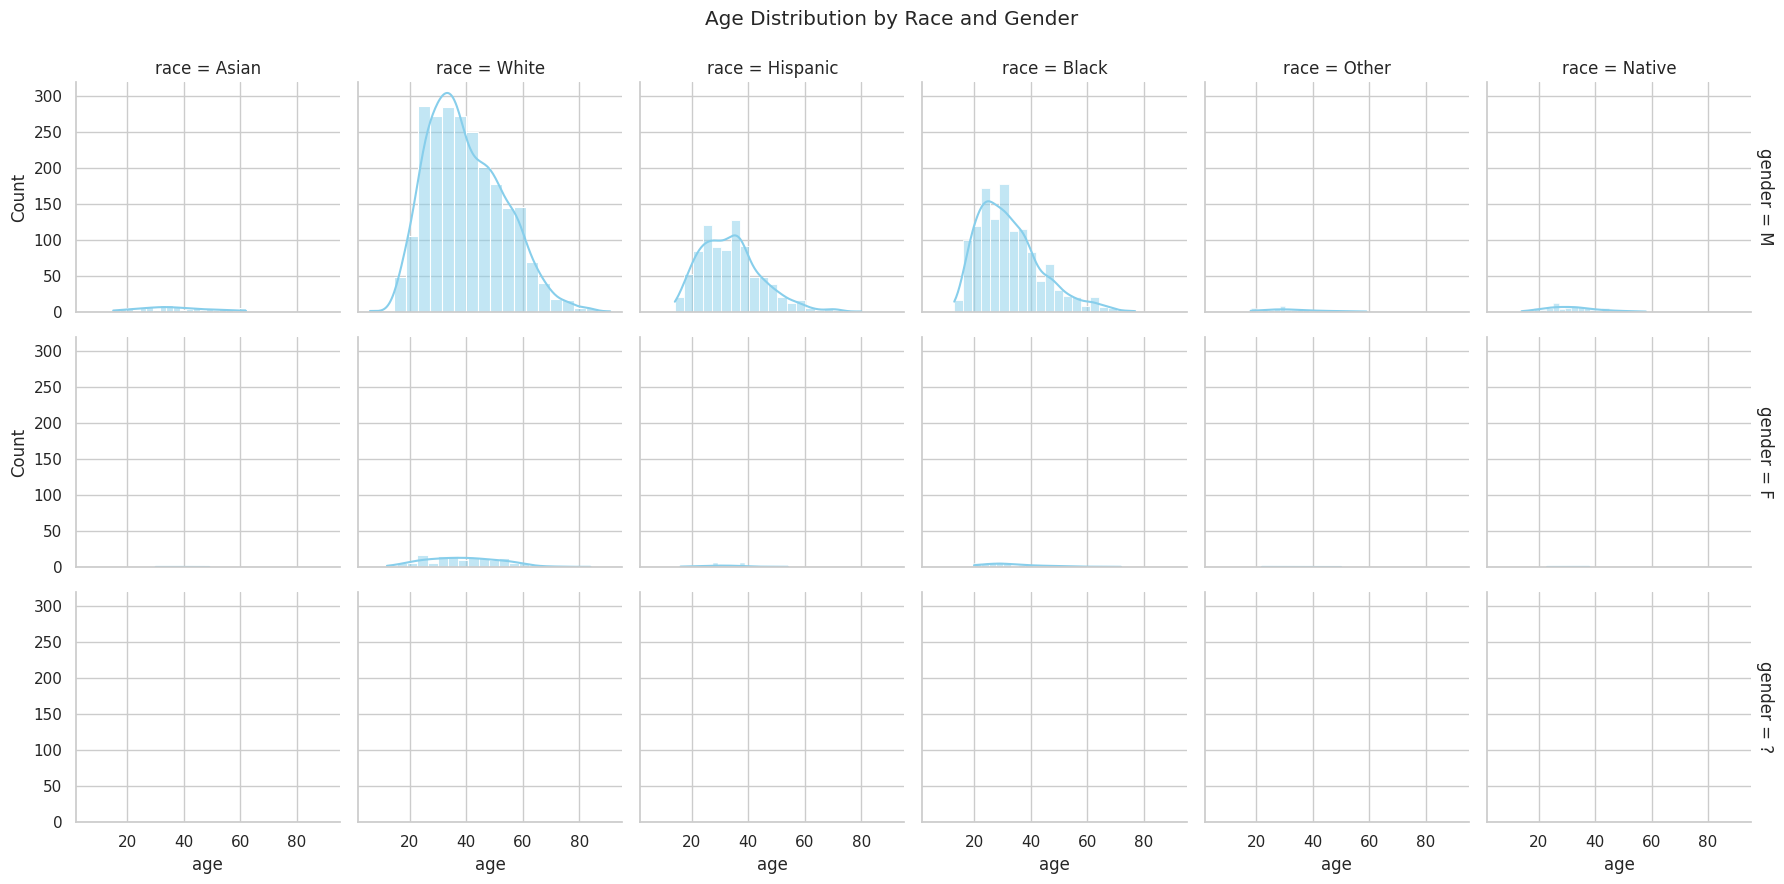

In [23]:
if "race" in df.columns and "gender" in df.columns and "age" in df.columns:
    g = sns.FacetGrid(df, col="race", row="gender", margin_titles=True, height=3)
    g.map(sns.histplot, "age", bins=20, kde=True, color="skyblue")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Age Distribution by Race and Gender")
    plt.show()

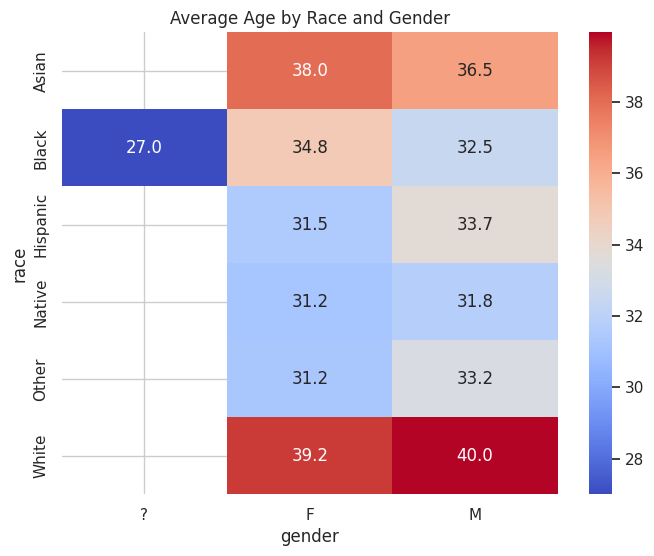

In [24]:
if "race" in df.columns and "gender" in df.columns and "age" in df.columns:
    pivot = df.pivot_table(values="age", index="race", columns="gender", aggfunc="mean")
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
    plt.title("Average Age by Race and Gender")
    plt.show()

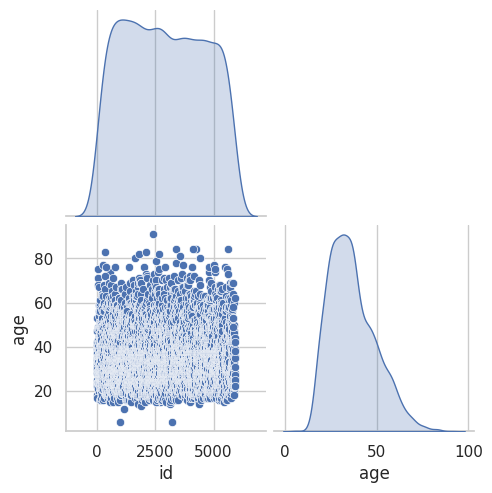

In [26]:
if len(num_cols) > 1:
    sns.pairplot(df[num_cols], diag_kind="kde", corner=True)
    plt.show()